In [ ]:
#Load packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing csv dataset
df= pd.read_csv('smmh.csv')

In [3]:
#Checking the datype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [4]:
#Renaming the columns
df = df.rename(columns={'1. What is your age?':'Age', '2. Gender':'Gender', '3. Relationship Status': 'Relationship status', '4. Occupation Status': 'Occupation', '5. What type of organizations are you affiliated with?':'Organizations', '6. Do you use social media?':'Do you use social media?', '7. What social media platforms do you commonly use?': 'Social media platform', '8. What is the average time you spend on social media every day?':'Time on social media', '9. How often do you find yourself using Social media without a specific purpose?':'Using social media without a purpose', '10. How often do you get distracted by Social media when you are busy doing something?' : 'Distracted by social media', "11. Do you feel restless if you haven't used Social media in a while?": 'Restless without social media','12. On a scale of 1 to 5, how easily distracted are you?': 'Easily distracted', '13. On a scale of 1 to 5, how much are you bothered by worries?':'Bothered by worries', '14. Do you find it difficult to concentrate on things?': 'Difficult to concentrate', '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?' : 'Comparing yourself in social media', '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'General comparisons', '17. How often do you look to seek validation from features of social media?':'Seeking validation through social media', '18. How often do you feel depressed or down?':'Depressed or down', '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'Interest change in daily activities', '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Sleep issues'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Timestamp                                481 non-null    object 
 1   Age                                      481 non-null    float64
 2   Gender                                   481 non-null    object 
 3   Relationship status                      481 non-null    object 
 4   Occupation                               481 non-null    object 
 5   Organizations                            451 non-null    object 
 6   Do you use social media?                 481 non-null    object 
 7   Social media platform                    481 non-null    object 
 8   Time on social media                     481 non-null    object 
 9   Using social media without a purpose     481 non-null    int64  
 10  Distracted by social media               481 non-n

In [5]:
#Checking the head of the columns
df.head()

,Timestamp,Age,Gender,Relationship status,Occupation,Organizations,Do you use social media?,Social media platform,Time on social media,Using social media without a purpose,...,Restless without social media,Easily distracted,Bothered by worries,Difficult to concentrate,Comparing yourself in social media,General comparisons,Seeking validation through social media,Depressed or down,Interest change in daily activities,Sleep issues
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [6]:
#Creating a copy of the dataset
df_clean = df.copy()
#Confirming the copy was created
df_clean.head(5)

,Timestamp,Age,Gender,Relationship status,Occupation,Organizations,Do you use social media?,Social media platform,Time on social media,Using social media without a purpose,...,Restless without social media,Easily distracted,Bothered by worries,Difficult to concentrate,Comparing yourself in social media,General comparisons,Seeking validation through social media,Depressed or down,Interest change in daily activities,Sleep issues
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


We will split column "7. What social media platforms do you commonly use" based on the commas for our analysis.

In [7]:
#Creating a dataframe with the split data
data = {
    '7. What social media platforms do you commonly use?': [
        'Facebook, Instagram, Twitter',
        'Instagram, Youtube',
        'Twitter, Snapchat, TikTok',
        'Reddit, Facebook'
    ]
}

df_split = pd.DataFrame(data)

# Spliting column '7. What social media platforms do you commonly use?' into multiple columns based on commas
all_platforms = df_split['7. What social media platforms do you commonly use?'].astype(str).str.split(',', expand=True)

# Define the list of possible social media platforms
platforms = ['Facebook', 'Twitter', 'Instagram', 'Youtube', 'Snapchat', 'Discord', 'Reddit', 'Pinterest', 'TikTok']

# Create a column for each platform and set 1 if that platform is in the response
for platform in platforms:
    df_split[platform] = df_split['7. What social media platforms do you commonly use?'].apply(lambda x: 1 if platform in x else 0)

#Printing the results
df_split


,7. What social media platforms do you commonly use?,Facebook,Twitter,Instagram,Youtube,Snapchat,Discord,Reddit,Pinterest,TikTok
0,"Facebook, Instagram, Twitter",1,1,1,0,0,0,0,0,0
1,"Instagram, Youtube",0,0,1,1,0,0,0,0,0
2,"Twitter, Snapchat, TikTok",0,1,0,0,1,0,0,0,1
3,"Reddit, Facebook",1,0,0,0,0,0,1,0,0


In [8]:
#Calculating the percentage of missing values
missing = df_clean.isnull().sum().sort_values(ascending=False)/len(df_clean)*100
missing

Organizations                              6.237006
Timestamp                                  0.000000
Restless without social media              0.000000
Interest change in daily activities        0.000000
Depressed or down                          0.000000
Seeking validation through social media    0.000000
General comparisons                        0.000000
Comparing yourself in social media         0.000000
Difficult to concentrate                   0.000000
Bothered by worries                        0.000000
Easily distracted                          0.000000
Distracted by social media                 0.000000
Age                                        0.000000
Using social media without a purpose       0.000000
Time on social media                       0.000000
Social media platform                      0.000000
Do you use social media?                   0.000000
Occupation                                 0.000000
Relationship status                        0.000000
Gender      

### Now that the data is splitted by the social media, we will proceed to rename the columns

In [9]:
#Renaming the social media columns
df_split = df_split.rename(columns={'Facebook':'Social Media 1', 'Twitter': 'Social Media 2', 'Instagram':'Social Media 3', 'Youtube':'Social Media 4', 'Snapchat': 'Social Media 5', 'Discord': 'Social Media 6', 'Reddit':'Social Media 7', 'Pinterest':'Social Media 8', 'TikTok':'Social Media 9'})
#Removing column '7. What social media platforms do you commonly use?'
df_split = df_split.drop(columns=['7. What social media platforms do you commonly use?'])
df_split.head(5)

,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9
0,1,1,1,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1
3,1,0,0,0,0,0,1,0,0


### Now we will proceed to merge our "df_split" columns to our dataset "df_clean"

In [10]:
df_clean = pd.concat([df, df_split], axis=1)
df_clean

,Timestamp,Age,Gender,Relationship status,Occupation,Organizations,Do you use social media?,Social media platform,Time on social media,Using social media without a purpose,...,Sleep issues,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Since there weren't missing values from column question 7, and we introduce missing values by splitting that column, we will proceed to replace NaN with 0.

In [11]:
#Fill Nan values with 0
df_clean[['Social Media 1','Social Media 2','Social Media 3','Social Media 4','Social Media 5','Social Media 6', 'Social Media 7', 'Social Media 8', 'Social Media 9']] = df_clean[['Social Media 1','Social Media 2','Social Media 3','Social Media 4','Social Media 5','Social Media 6', 'Social Media 7', 'Social Media 8', 'Social Media 9']].fillna(0)

### We will now look at missing values in our data.

In [12]:
#Calculating the percentage of missing values
missing = df_clean.isnull().sum().sort_values(ascending=False)/len(df_clean)*100
missing

Organizations                              6.237006
Timestamp                                  0.000000
General comparisons                        0.000000
Social Media 8                             0.000000
Social Media 7                             0.000000
Social Media 6                             0.000000
Social Media 5                             0.000000
Social Media 4                             0.000000
Social Media 3                             0.000000
Social Media 2                             0.000000
Social Media 1                             0.000000
Sleep issues                               0.000000
Interest change in daily activities        0.000000
Depressed or down                          0.000000
Seeking validation through social media    0.000000
Comparing yourself in social media         0.000000
Age                                        0.000000
Difficult to concentrate                   0.000000
Bothered by worries                        0.000000
Easily distr

## Do we want to keep column "5. What type of organizations are you affiliated with?" ??

### We will now look at describe() so we can have an idea if there are any outliers in the dataset.

In [13]:
#Describing the data
df.describe()

,Age,Using social media without a purpose,Distracted by social media,Restless without social media,Easily distracted,Bothered by worries,Difficult to concentrate,Comparing yourself in social media,General comparisons,Seeking validation through social media,Depressed or down,Interest change in daily activities,Sleep issues
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The dataset doesn't seem to have outliers. We will proceed to transform to create a "Social Media Count" column.

In [14]:
#Creating a total social media count column by summing the social media columns
df_clean['Social Media Count']= df_clean['Social Media 1'] + df_clean['Social Media 2'] + df_clean['Social Media 3'] + df_clean['Social Media 4'] + df_clean['Social Media 5'] + df_clean['Social Media 6'] + df_clean['Social Media 7'] + df_clean['Social Media 8'] + df_clean['Social Media 9']

df_clean.head(5)

,Timestamp,Age,Gender,Relationship status,Occupation,Organizations,Do you use social media?,Social media platform,Time on social media,Using social media without a purpose,...,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9,Social Media Count
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### We encountering categorical data, for our analysis we need numerical so we will convert the categorical columns into numerical data.

In [15]:
df_clean

,Timestamp,Age,Gender,Relationship status,Occupation,Organizations,Do you use social media?,Social media platform,Time on social media,Using social media without a purpose,...,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9,Social Media Count
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will proceed to filter our data for young females (18-29)

In [16]:
young_females = df_clean[(df_clean['Age']>=18) & (df_clean['Age']<=29) & (df_clean['Gender']=='Female')]
young_females.head(5)

,Timestamp,Age,Gender,Relationship status,Occupation,Organizations,Do you use social media?,Social media platform,Time on social media,Using social media without a purpose,...,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9,Social Media Count
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4/18/2022 19:33:48,22.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Checking the data shape to ensure the data was filtered correctly
young_females.shape

(218, 31)

It was decided to remove unnecesary columns like timestamp, organizations and social media platform

In [18]:
#Drop columns that are not needed
young_females = young_females.drop(columns=['Timestamp', 'Organizations','Social media platform'])
young_females.head(5)

,Age,Gender,Relationship status,Occupation,Do you use social media?,Time on social media,Using social media without a purpose,Distracted by social media,Restless without social media,Easily distracted,...,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9,Social Media Count
1,21.0,Female,Single,University Student,Yes,More than 5 hours,4,3,2,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,21.0,Female,Single,University Student,Yes,Between 3 and 4 hours,3,2,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,21.0,Female,Single,University Student,Yes,More than 5 hours,4,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,21.0,Female,Single,University Student,Yes,Between 2 and 3 hours,3,5,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,22.0,Female,Single,University Student,Yes,Between 2 and 3 hours,4,4,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will keep young_females as a categorical dataset and we will transform to numberical in the new young_females_numerical so we can create different analysis charts.

In [19]:
young_females_numerical = young_females.copy()

In [20]:
#Converting categorical data to numerical data.
young_females_numerical['Time on social media'] = df_clean['Time on social media'].replace({'Less than an Hour':0, 'Between 1 and 2 hours':1, 'Between 2 and 3 hours':2, 'Between 3 and 4 hours':3, 'Between 4 and 5 hours':4, 'More than 5 hours':5})
young_females_numerical['Do you use social media?'] = df_clean['Do you use social media?'].replace({'Yes':1,})
young_females_numerical['Occupation'] = df_clean['Occupation'].replace({'School student':0, 'School Student':0, 'University Student':1, 'Salaried Worker':2, 'Retired':3 })
young_females_numerical['Relationship status'] = df_clean['Relationship status'].replace({'Single':0, 'In a relationship':1, 'Married':2, 'Divorced':3 })
young_females_numerical['Gender'] = df_clean['Gender'].replace({'Male':0, 'Female':1 })
young_females_numerical.head(5)


,Age,Gender,Relationship status,Occupation,Do you use social media?,Time on social media,Using social media without a purpose,Distracted by social media,Restless without social media,Easily distracted,...,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9,Social Media Count
1,21.0,1,0,1,1,5,4,3,2,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,21.0,1,0,1,1,3,3,2,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,21.0,1,0,1,1,5,4,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,21.0,1,0,1,1,2,3,5,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,22.0,1,0,1,1,2,4,4,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will create a two dataframes from mental_health_columns and social_media_columns, and then get the statistics 

In [21]:
# Summary statistics for mental health variables
mental_health_columns = ['Depressed or down', 'Easily distracted', 'Bothered by worries', 'Difficult to concentrate', 'Interest change in daily activities', 'Sleep issues']
social_media_columns = ['Using social media without a purpose','Time on social media', 'Distracted by social media', 'Restless without social media', 'Seeking validation through social media']
# Calculate mean, median, and standard deviation for mental health and social media usage
mental_health_stats = young_females_numerical[mental_health_columns].describe()
social_media_stats = young_females_numerical[social_media_columns].describe()
print("Mental Health Statistics:\n", mental_health_stats)
print("Social Media Usage Statistics:\n", social_media_stats)


Mental Health Statistics:
        Depressed or down  Easily distracted  Bothered by worries  \
count         218.000000         218.000000           218.000000   
mean            3.573394           3.559633             3.853211   
std             1.197782           1.114886             1.142603   
min             1.000000           1.000000             1.000000   
25%             3.000000           3.000000             3.000000   
50%             4.000000           4.000000             4.000000   
75%             5.000000           4.000000             5.000000   
max             5.000000           5.000000             5.000000   

       Difficult to concentrate  Interest change in daily activities  \
count                218.000000                           218.000000   
mean                   3.472477                             3.463303   
std                    1.222551                             1.164384   
min                    1.000000                             1.000000   


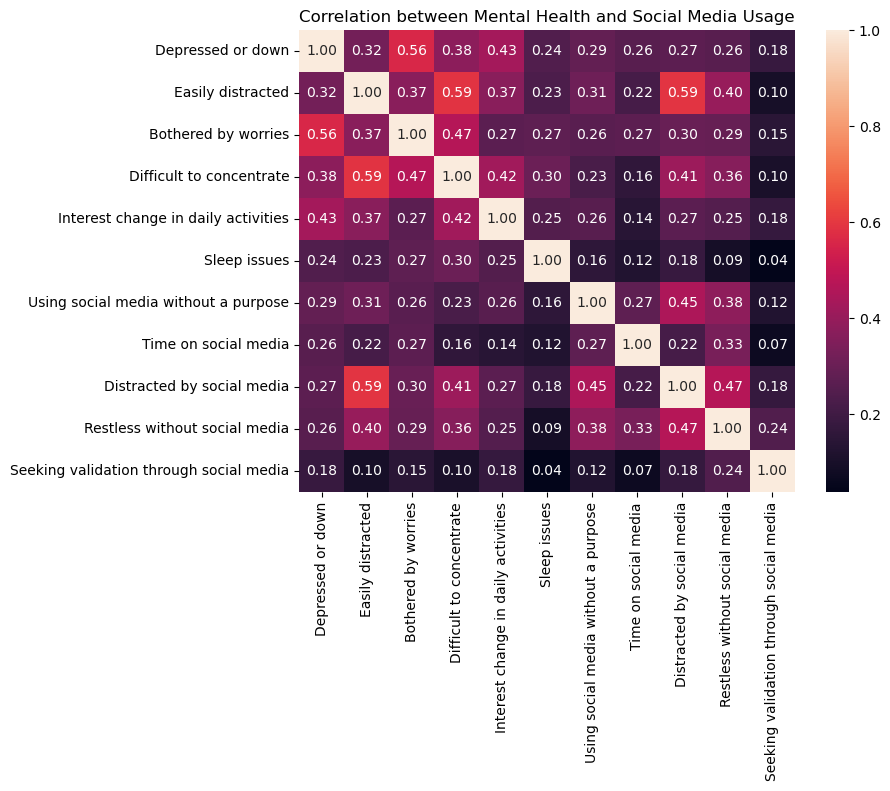

In [27]:
# Correlation between mental health and social media variables
correlation_matrix = young_females_numerical[mental_health_columns + social_media_columns].corr()
# Display correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation between Mental Health and Social Media Usage")
plt.show()

We will proceed to create feature importance based on the higher depression count.

In [ ]:
#Split the data into training and testing sets
X = young_females_numerical.drop(columns=['Depressed or down'])
y_binary = (young_females_numerical['Depressed or down'] >= 3).astype(int)

In [ ]:
#Creating the feature names
features_names= ['Age', 'Gender', 'Relationship status', 'Occupation', 'Organizations', 'Do you use social media?', 'Social media platform', 'Time on social media', 'Using social media without a purpose', 'Distracted by social media', 'Restless without social media', 'Easily distracted', 'Bothered by worries', 'Difficult to concentrate', 'Comparing yourself in social media', 'General comparisons', 'Seeking validation through social media', 'Depressed or down', 'Interest change in daily activities', 'Sleep issues']

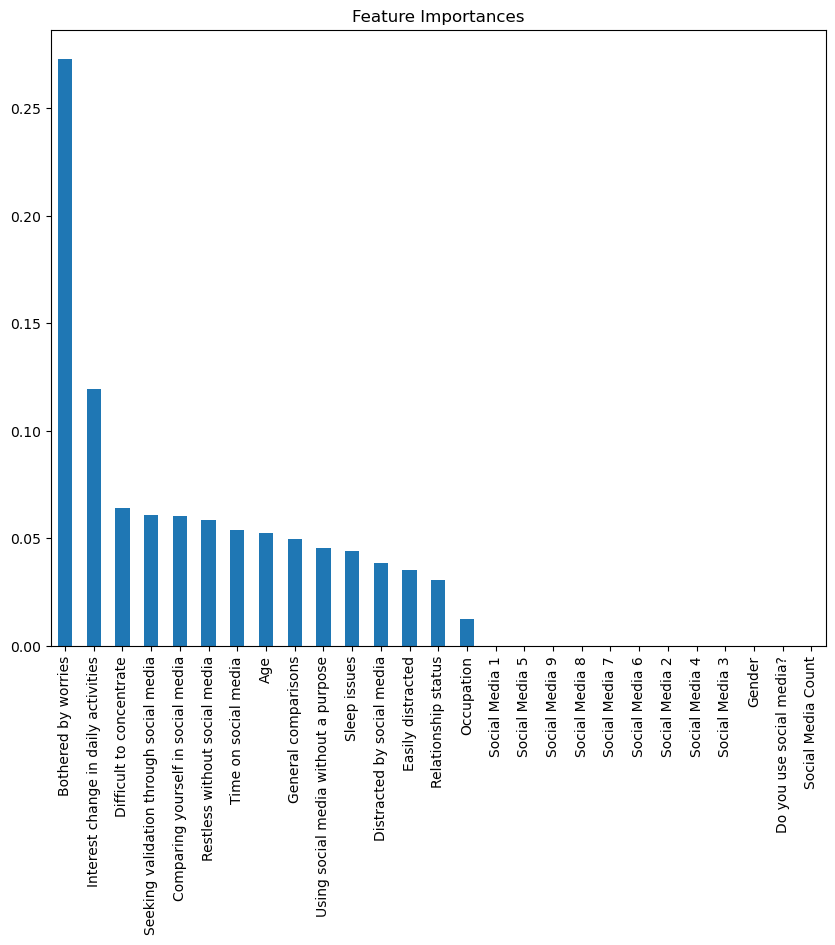

In [ ]:
#Creating feature importance plot
rf =RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y_binary)
feat_importances = pd.Series(rf.feature_importances_, index= X.columns)
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.plot(kind ='bar', figsize=(10,8), title='Feature Importances')
plt.show()